In [2]:
import numpy as np
from keras import Model
from keras.layers import Dense, Input, BatchNormalization
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
TRAIN_DATA_PATH = 'data.npz'
INPUT_SHAPE = (5, )
OUTPUT_UNITS = 500

In [4]:
with np.load(TRAIN_DATA_PATH) as data:
    X = data['X']
    Y = data['Y']

In [5]:
print(X.shape, Y.shape)

(100000, 5) (100000, 500)


In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

In [7]:
# clear memory size ~400MB
del X
del Y

In [8]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(90000, 5) (90000, 500) (10000, 5) (10000, 500)


In [167]:
def build_model():
    inputs = Input(shape=INPUT_SHAPE, name='input_layer')
    
    l1 = Dense(64, activation='relu', name='hidden_layer1')(inputs)
    l2 = BatchNormalization()(l1);
    l3 = Dense(64, activation='relu', name='hidden_layer2')(l2)
    l4 = BatchNormalization()(l3)
    l5 = Dense(64, activation='relu', name='hidden_layer3')(l4)
    l6 = BatchNormalization()(l5)
    l7 = Dense(64, activation='relu', name='hidden_layer4')(l6)
    l8 = BatchNormalization()(l7)
    
    outputs = Dense(OUTPUT_UNITS, name='output_layer', activation='sigmoid')(l8)
    
    model = Model(inputs=inputs, outputs=outputs, name='forward_model')
    model.compile(loss='mse', optimizer='rmsprop', metrics=['accuracy'])
    
    return model

In [168]:
model = build_model()

In [169]:
model.summary()

Model: "forward_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     (None, 5)                 0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 64)                384       
_________________________________________________________________
batch_normalization_49 (Batc (None, 64)                256       
_________________________________________________________________
hidden_layer2 (Dense)        (None, 64)                4160      
_________________________________________________________________
batch_normalization_50 (Batc (None, 64)                256       
_________________________________________________________________
hidden_layer3 (Dense)        (None, 64)                4160      
_________________________________________________________________
batch_normalization_51 (Batc (None, 64)              

In [170]:
epochs = 10
batch_size = 64

In [171]:
history = model.fit(x_train, y_train, batch_size=64, epochs=epochs, validation_split=0.2, shuffle=True)

Train on 72000 samples, validate on 18000 samples
Epoch 1/10
72000/72000 [==============================] - 6s 83us/step - loss: 0.0416 - accuracy: 0.0137 - val_loss: 0.0210 - val_accuracy: 0.0106
Epoch 2/10
72000/72000 [==============================] - 5s 69us/step - loss: 0.0192 - accuracy: 0.0206 - val_loss: 0.0182 - val_accuracy: 0.0344
Epoch 3/10
72000/72000 [==============================] - 5s 68us/step - loss: 0.0170 - accuracy: 0.0229 - val_loss: 0.0156 - val_accuracy: 0.0101
Epoch 4/10
72000/72000 [==============================] - 5s 69us/step - loss: 0.0147 - accuracy: 0.0282 - val_loss: 0.0093 - val_accuracy: 0.0424
Epoch 5/10
72000/72000 [==============================] - 5s 69us/step - loss: 0.0126 - accuracy: 0.0322 - val_loss: 0.0082 - val_accuracy: 0.0480
Epoch 6/10
72000/72000 [==============================] - 5s 69us/step - loss: 0.0112 - accuracy: 0.0350 - val_loss: 0.0120 - val_accuracy: 0.0299
Epoch 7/10
72000/72000 [==============================] - 5s 73us/st

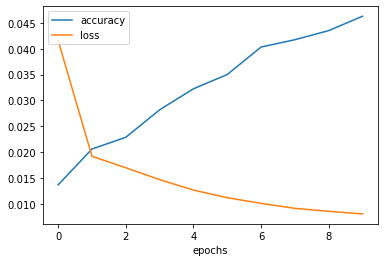

In [172]:
xc = range(epochs)
plt.plot(xc, history.history['accuracy'])
plt.plot(xc, history.history['loss'])
plt.xlabel('epochs')
plt.legend(['accuracy', 'loss'], loc='upper left')

In [173]:
test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Test loss: 0.009783397503197193
Test accuracy: 0.04619999974966049


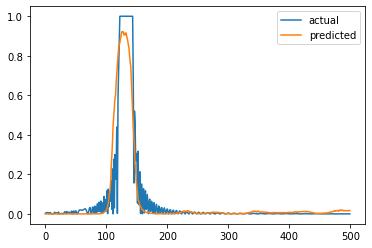

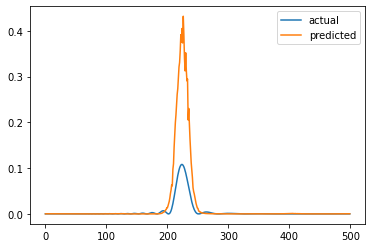

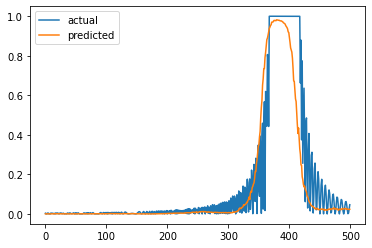

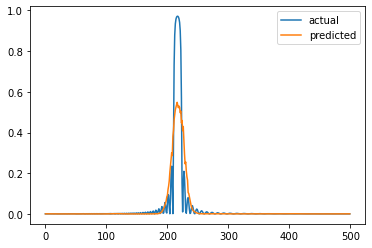

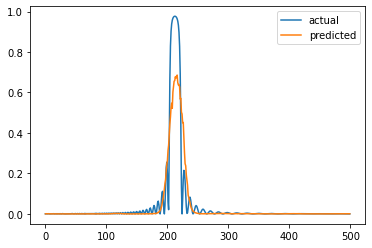

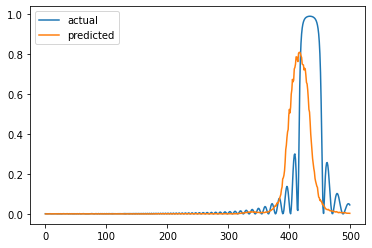

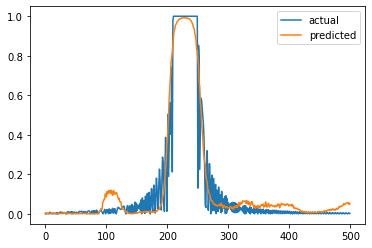

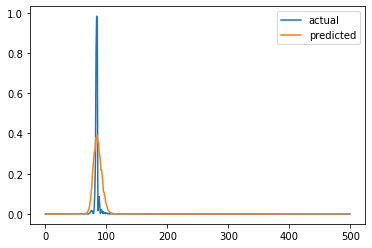

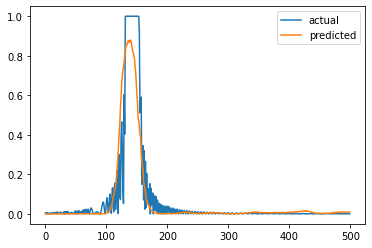

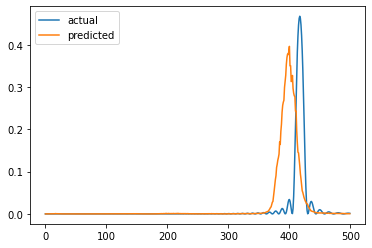

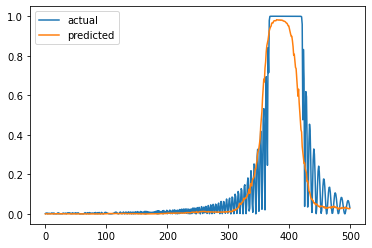

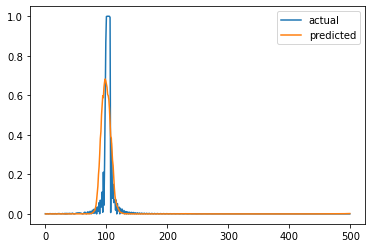

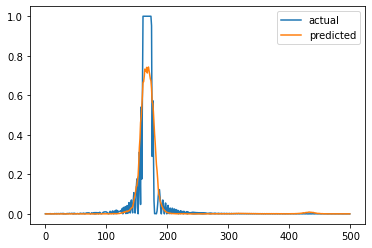

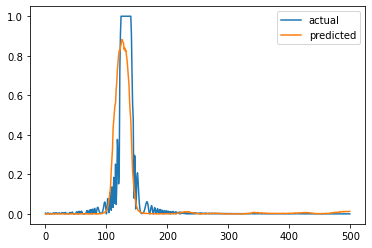

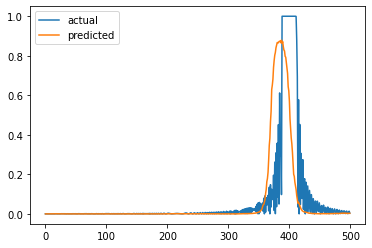

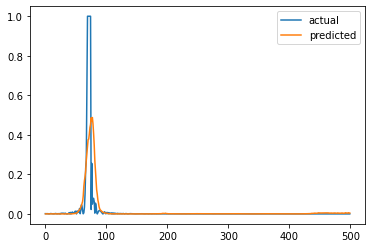

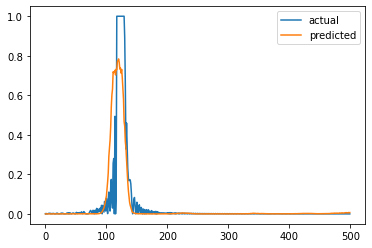

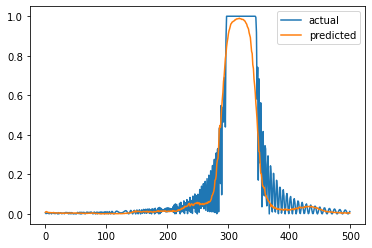

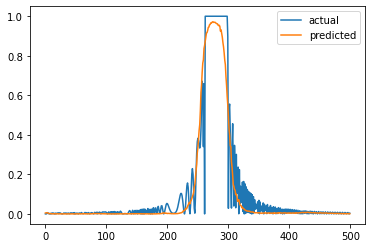

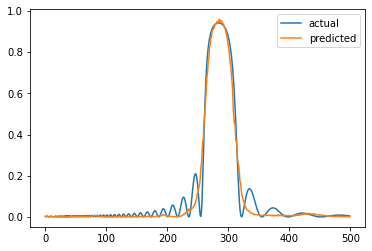

In [174]:
xc = range(epochs)
predictions = model.predict(x_test)
for i in range(20):
    fig, ax = plt.subplots()
    ax.plot(y_test[i])
    ax.plot(predictions[i])
    ax.legend(['actual', 'predicted'])